# Trabajo Práctico Minería de Datos 2024
## Docentes
- Spetale, Flavio
- Pellerejo, Ivan
- Gatti, Ramiro

## Integrante
- Sofía Arce

# Preparacion del entorno

In [172]:
import os

REPO_NAME = "MINERIA"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/itssofiarce/MINERIA.git
  os.chdir(REPO_NAME)

# Librerías


In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis Exploratorio


In [174]:
df = pd.read_csv('/content/MINERIA/tp3_2024/dxWeather.csv')

In [175]:
df.head()

,Temperatura,Humedad,VientoVelocidad,Precipitation,PresionAtmosferica,Localizacion,TipoClima,Estacion
0,39,96,8.5,71,1011.43,Llanura,Nublado,Primavera
1,30,64,7.0,16,1018.72,Montania,Soleado,Primavera
2,38,83,1.5,82,1026.25,Costa,Soleado,Primavera
3,32,55,3.5,26,1010.03,Llanura,Nublado,Verano
4,3,85,6.0,96,984.46,Llanura,Nevado,Invierno


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         10090 non-null  int64  
 1   Humedad             10090 non-null  int64  
 2   VientoVelocidad     10090 non-null  float64
 3   Precipitation       10090 non-null  int64  
 4   PresionAtmosferica  10090 non-null  float64
 5   Localizacion        10090 non-null  object 
 6   TipoClima           10090 non-null  object 
 7   Estacion            10090 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 630.8+ KB


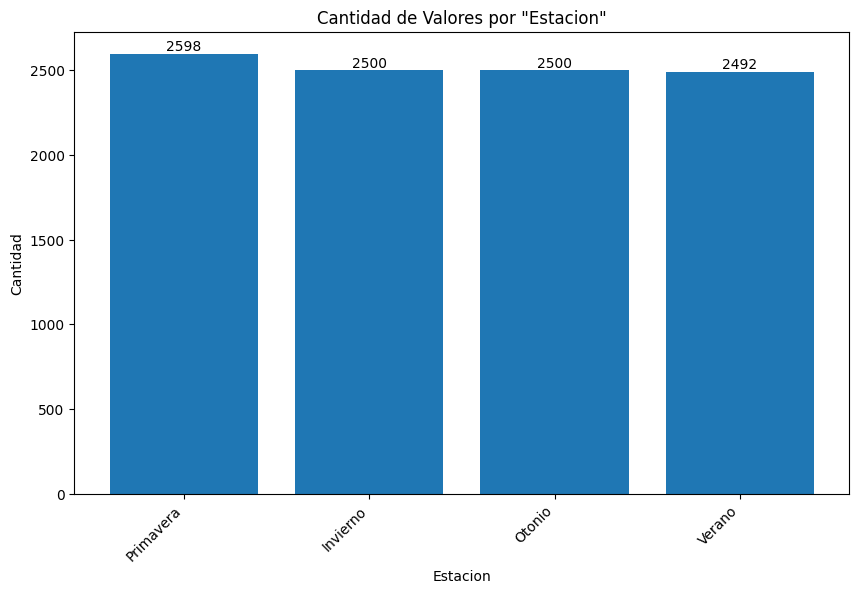

In [177]:
# Conteo de variable muestras con las categorias de las variables a predecir
conteo = df['Estacion'].value_counts()

plt.figure(figsize=(10, 6))
grafico = plt.bar(conteo.index, conteo.values)

plt.xlabel('Estacion')
plt.ylabel('Cantidad')
plt.title('Cantidad de Valores por "Estacion"')
plt.xticks(rotation=45, ha='right')

for bar in grafico:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}', ha='center', va='bottom', fontsize=10)


plt.show()

Hay un leve desbalanceo en las clases, predominanado la de primavera. Sin embargo, al representar menos del 10% del conjunto el total de la diferencia entre la clase primavera y verano que menos tiene, voy a continuar sin balancear las clases.

In [178]:
df.describe()

,Temperatura,Humedad,VientoVelocidad,Precipitation,PresionAtmosferica
count,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000
mean,21.872349,67.195045,9.634936,50.796333,1007.685836
std,16.426722,20.463797,6.795890,32.333798,38.763971
min,-24.000000,20.000000,0.000000,0.000000,800.230000
25%,13.000000,55.000000,5.000000,18.000000,998.570000
50%,23.000000,69.000000,8.500000,53.000000,1010.315000
75%,32.000000,81.000000,13.500000,80.000000,1017.820000
max,109.000000,109.000000,47.500000,109.000000,1199.210000


### Distribución de las variables numéricas agrupadas por estación



<ipython-input-179-9bd010de3480>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=station_data, x=var, kde=True, bins=15, palette='Set2', ax=ax)
<ipython-input-179-9bd010de3480>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=station_data, x=var, kde=True, bins=15, palette='Set2', ax=ax)
<ipython-input-179-9bd010de3480>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=station_data, x=var, kde=True, bins=15, palette='Set2', ax=ax)
<ipython-input-179-9bd010de3480>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=station_data, x=var, kde=True, bins=15, palette='Set2', ax=ax)
<ipython-input-179-9bd010de3480>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=station_data, x=var, kde=True, bins=15, palette='Set2', ax=ax)
<ipython-input-

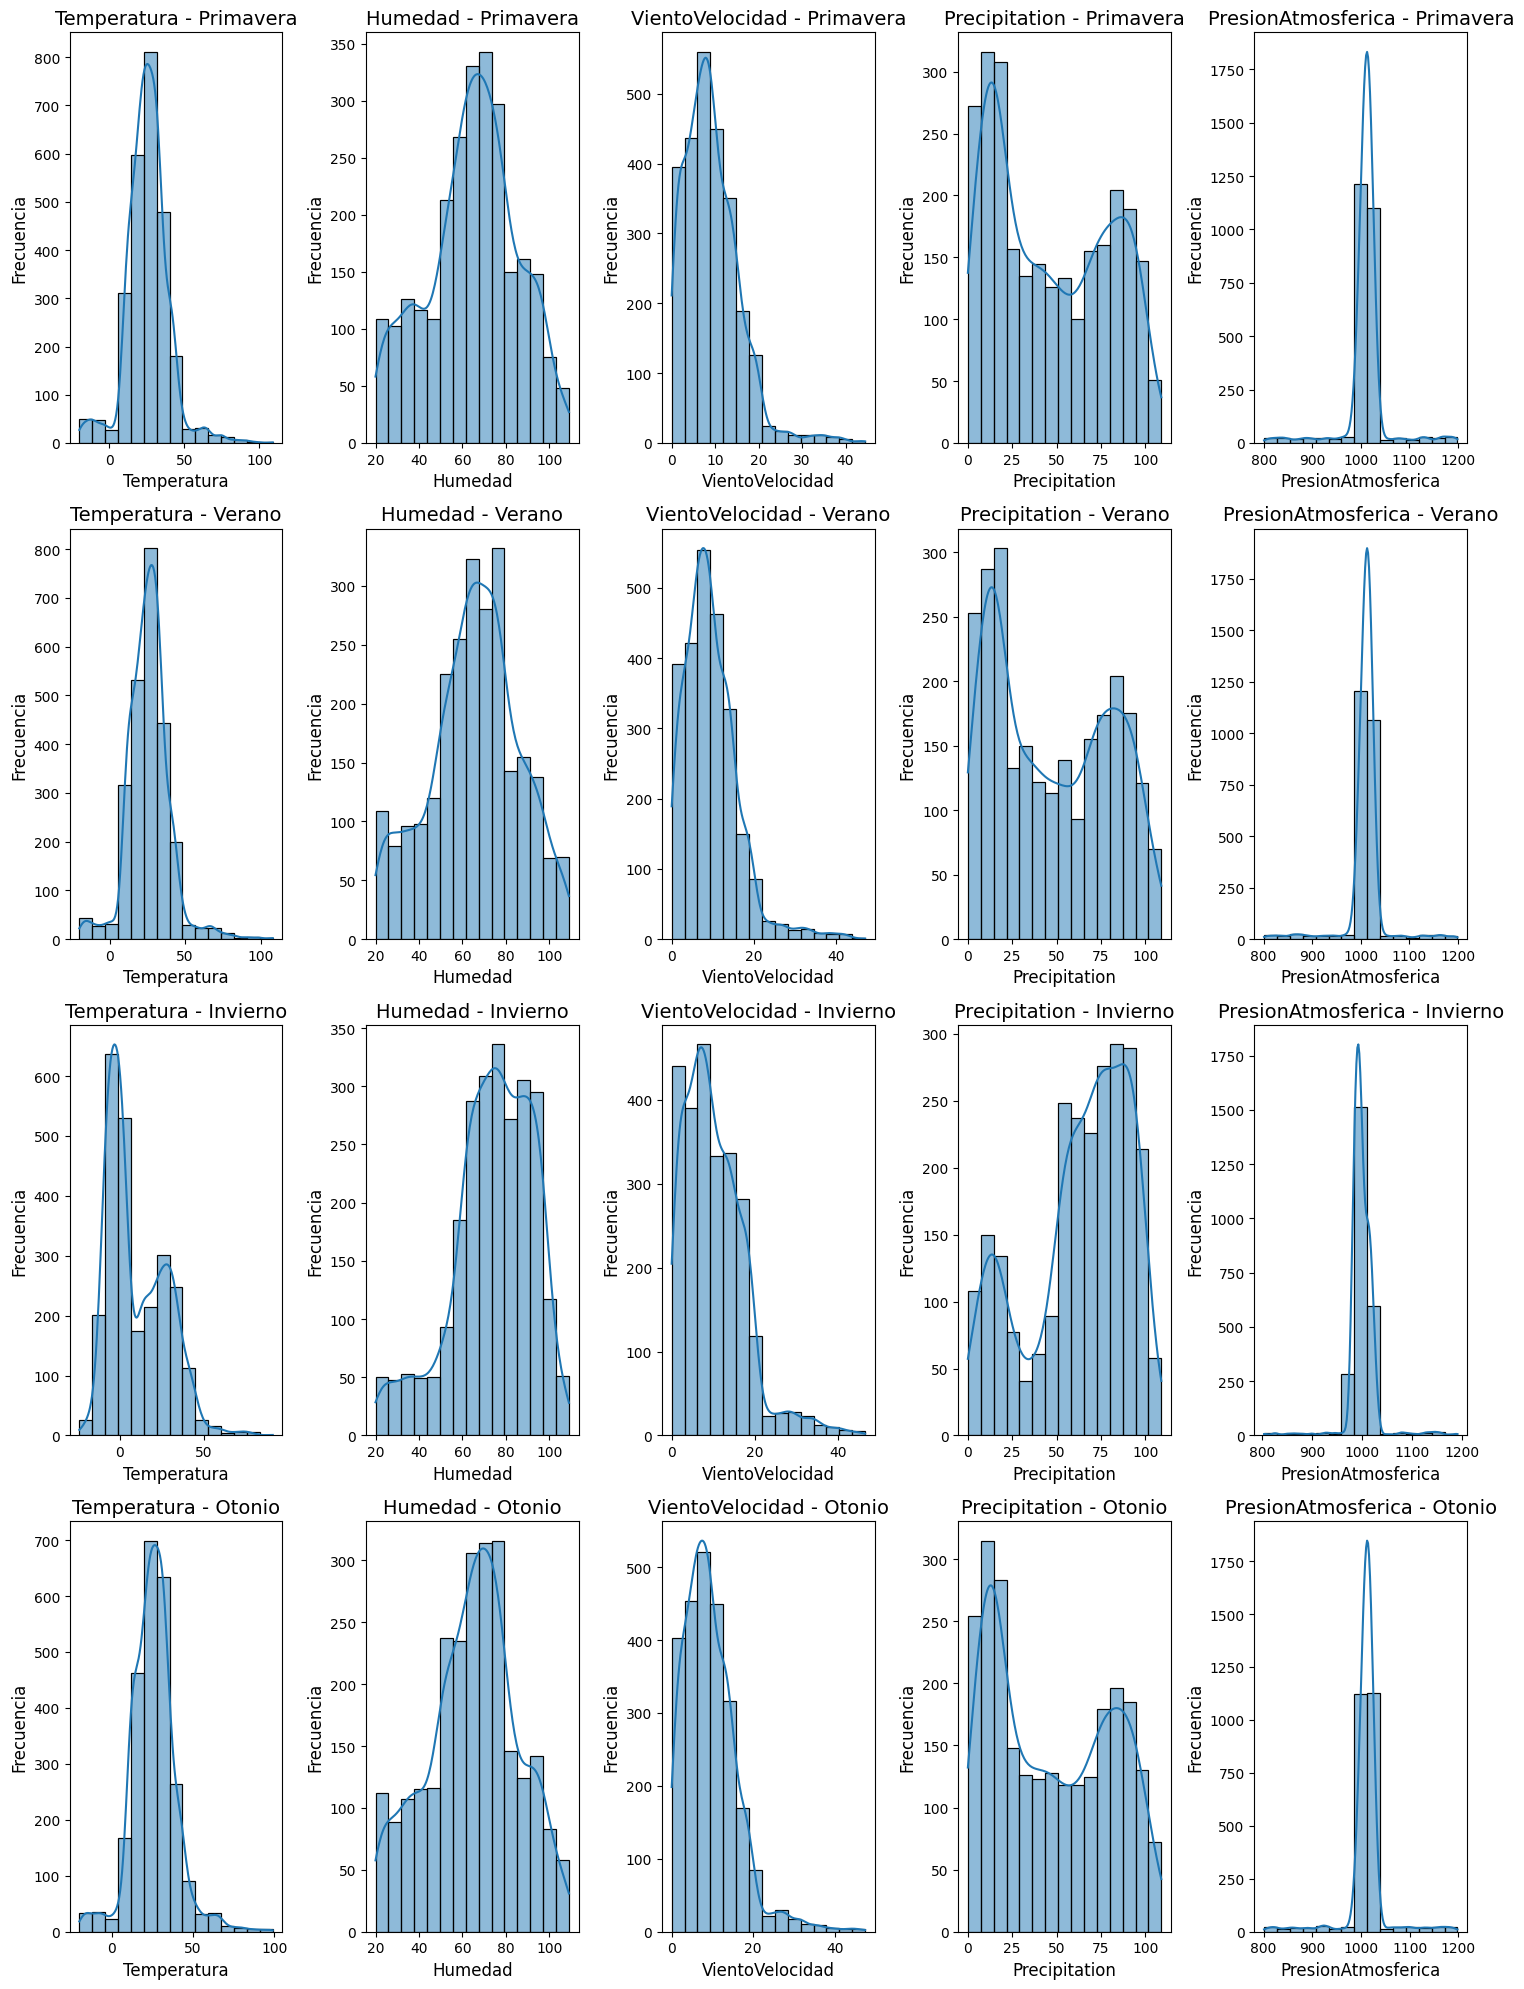

In [179]:
columns_to_plot = ['Temperatura', 'Humedad', 'VientoVelocidad', 'Precipitation', 'PresionAtmosferica']
stations = df['Estacion'].unique()

fig, axes = plt.subplots(nrows=len(stations) , ncols=len(columns_to_plot), figsize=(15, 5*len(stations) ))
axes = axes.flatten()

# Histogramas para cada estación
for row, station in enumerate(stations):
    station_data = df[df['Estacion'] == station]

    for col, var in enumerate(columns_to_plot):
        ax = axes[row * len(columns_to_plot) + col]
        # Hstograma para una estación y variable
        sns.histplot(data=station_data, x=var, kde=True, bins=15, palette='Set2', ax=ax)
        ax.set_title(f'{var} - {station}', fontsize=14)
        ax.set_xlabel(var, fontsize=12)
        ax.set_ylabel('Frecuencia', fontsize=12)


# Mostrar el gráfico
plt.tight_layout()
plt.show()


No se observan valores atípos de las variables según las estaciones. Este tipo de observación de los datos me permite identificar si las variables tienen algun tipo de patrón dependiendo de las estaciones. Por ejemplo, en inviernos las temperaturas máximas son mas bajas que las temperaturas máximas en invierno. En otoño la cantida de lluvias son mas altas que las demas.




In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()

df['TipoClima']=le.fit_transform(df[['TipoClima']])
df['Localizacion']=le.fit_transform(df[['Localizacion']])
df['Estacion']=le.fit_transform(df[['Estacion']])

El Label Enconder está mal, no tienen ordinalidad las clases. (Quizas aumentaba mucho la dimensionalidad de mis datos)


In [181]:
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

Invierno: 0
Otonio: 1
Primavera: 2
Verano: 3


In [182]:
X = df.drop(['Estacion'],axis= 1)
y = df['Estacion']

In [183]:
y.head()

,Estacion
0,2
1,2
2,2
3,3
4,0


<Axes: >

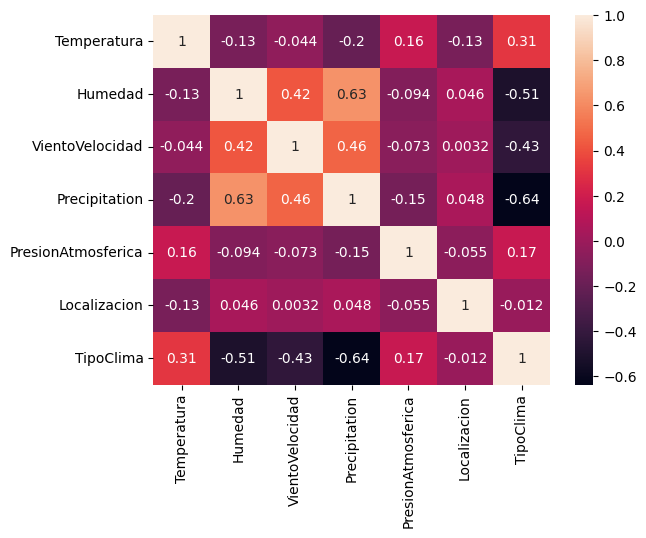

In [184]:
sns.heatmap(X.corr(),annot=True)

Las variables con mayor correlación positiva son las de precipitación y humedad con un 0.63. Seguidas de precipitacion y la velocidad del viento.

# Predicción de Estación


Librerías para la construcción de modelos

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Modelo
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Validación Cruzada
from sklearn.model_selection import cross_val_score

In [186]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size= .25,random_state=123)

## SVM - Kernel Lineal

Cross Validation K=5


In [187]:
### Sin estandarizar los datos --> SVC por default valor de C = 1.
clf = SVC(C= 1,kernel='linear', random_state=123)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


              precision    recall  f1-score   support

           0       0.63      0.51      0.56       744
           1       0.22      0.28      0.25       491
           2       0.45      0.31      0.37       964
           3       0.14      0.27      0.19       324

    accuracy                           0.36      2523
   macro avg       0.36      0.34      0.34      2523
weighted avg       0.42      0.36      0.38      2523



<Axes: >

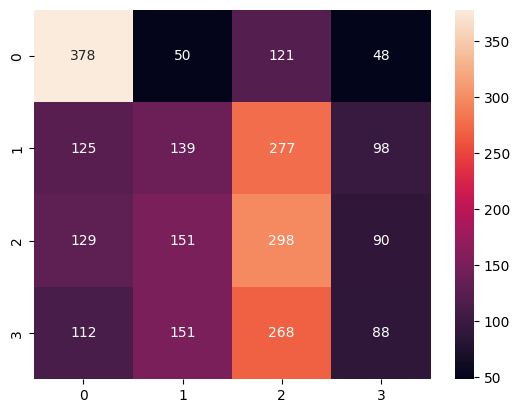

In [188]:
# Matriz de confusion
print(classification_report(y_pred,y_test))
cm = (confusion_matrix(y_test, y_pred))
sns.heatmap(cm,annot=True, fmt='g')

Sin estandarizar los datos se obtiene una accuracy muy baja del 36%. En cuanto a la exhaustividad es mas "preciso" para las muestras de las clases de Invierno y las de Primavera y menos preciso para las de Verano - Otonio.
En cuanto al recall, el modelo idenitifica correctamente el 51% de las instancias reales de Invierno mientras que para las de verano son solamente el 30%.

El f1-score para invierno del 56 me indica que hay un balance en precisión y recall pero que no logra en general una buena predicción para las instancias  de Invierno.

Una primera sospecha del bajo rendimiento de verano es que era la clase de menor cantidad de muestras aunque esa diferencia no era significativa y otra sospecha de la baja accuracy puede ser la falta de estandarización de los datos. Por lo que estandarizaré los datos y según la documentación oficial de sckit learn como las clases estan desbalanceadas agregaré: *class_weight='balanced'* y compararé los nuevos resultados con los estos.


In [189]:
### C = 0.05
clf_1 = make_pipeline(SVC(C = 0.05, kernel='linear', class_weight='balanced', verbose=True, decision_function_shape='ovo', random_state=123))

clf_1.fit(X_train, y_train)
y_pred_1 = clf_1.predict(X_test)

[LibSVM]

In [190]:
scores = cross_val_score(clf_1, X, y, cv=5)
print(scores)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.3592666  0.37710605 0.37958375 0.36471754 0.3666997 ]


In [191]:
labels_heatmap=['Invierno', 'Otonio', 'Primavera', 'Verano']
labels_heatmap_2=['VP', 'Primavera', 'Verano']

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       573
           1       0.31      0.30      0.30       663
           2       0.35      0.30      0.32       782
           3       0.23      0.29      0.26       505

    accuracy                           0.37      2523
   macro avg       0.37      0.38      0.37      2523
weighted avg       0.37      0.37      0.37      2523



<Axes: >

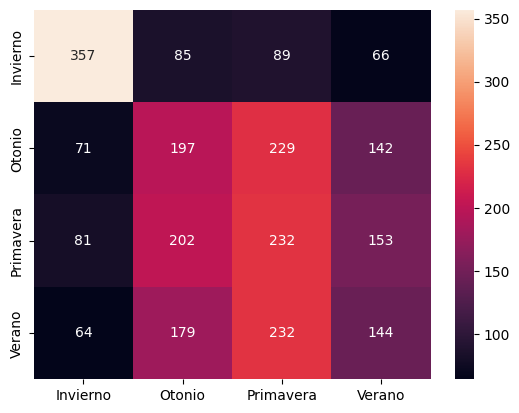

In [223]:
# Matriz de confusion
print(classification_report(y_pred_1,y_test))

cm_1 = (confusion_matrix(y_test, y_pred_1))

sns.heatmap(cm_1,yticklabels=labels_heatmap, xticklabels=labels_heatmap, annot=True, fmt='g')

In [193]:
# Test accuracy VS Train Accuracy:
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.364741641337386
Test Accuracy: 0.3579072532699168


Al estandarizar los datos, si bien no mejora el accuracy general, logra aumentar en 13 puntos la precisión de verano que era la que menos precisión tenía en el modelo anterior. Aunque a su vez tambien se redujo el accuracy para las instancias de Invierno y Primavera. Es decir que al estandarizar los valores de las clases se logra "distribuir" el accuracy de las clases.

Siguiendo la diagonal de la matriz de correlación:
  - Invierno: 357 instancias clasificadas correctamente como Invierno
  - Otonio: 197 nstancias clasificadas correctamente como Otonio
  - Primavera: 232 instancias clasificadas correctamente como Primavera
  - Verano: 144 nstancias clasificadas correctamente como Verano

Fuera de la diagonal los resultados de las clasificaciones mas relevantes son
  - las 229 instancias de otoño clasificadas erróneamente como primavera.
  - las 232 instancias de verano clasificadas erróneamente tambien como primavera.

Una posible explicación para esta conducta del modelo podría verse en los datos ya que en el análisis exploratorio por estaciones, primavera - verano - otonio compartían distribuciones de las variables, mientras que Invierno tenia una distrucion levemente diferente para todas las variables y a su vez, la clase primavera era la predominante.

Por último, hay un leve sobre ajuste sobre los datos de train accuracy en train: 0.36 vs test: 0.35 --> una explicación podría ser la elección del C = 0.05 que baja la regularización.


In [194]:
## C = 0.5
clf_2 = SVC(C = 0.5, kernel='linear', class_weight='balanced', verbose=True, random_state=123)

clf_2.fit(X_train, y_train)
y_pred_2 = clf_2.predict(X_test)

[LibSVM]

In [195]:
scores = cross_val_score(clf_2, X, y, cv=5)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

array([0.36521308, 0.36323092, 0.36769078, 0.37115956, 0.37016848])

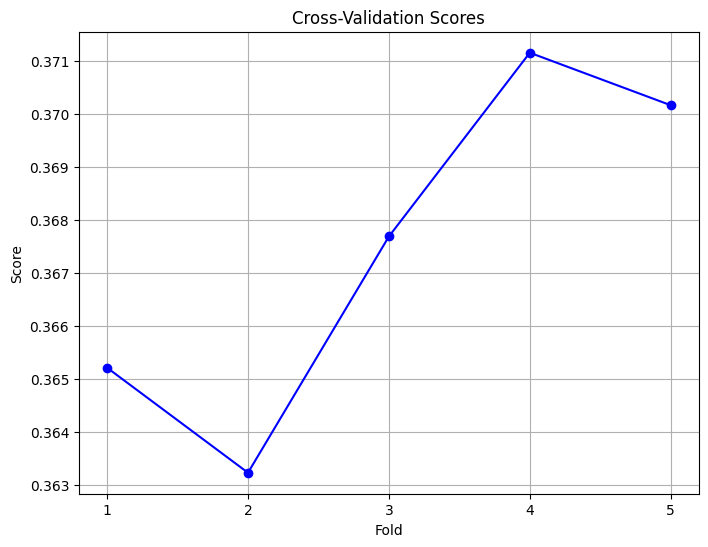

In [196]:
# Grafico
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.xticks(np.arange(1, len(scores) + 1))
plt.grid(True)
plt.show()

In [197]:
print(classification_report(y_pred_2,y_test))

              precision    recall  f1-score   support

           0       0.62      0.54      0.57       687
           1       0.29      0.29      0.29       651
           2       0.30      0.32      0.31       630
           3       0.25      0.28      0.26       555

    accuracy                           0.36      2523
   macro avg       0.36      0.35      0.36      2523
weighted avg       0.37      0.36      0.37      2523



In [198]:
# Test accuracy VS Train Accuracy:
train_accuracy = clf_2.score(X_train, y_train)
test_accuracy = clf_2.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.3702920576186071
Test Accuracy: 0.3606817281014665


Al aumentar el valor del paramentro de regularización C la precisión para la clase de verano mejora en 8 puntos comparado con el anterior.
Los resultados de la validación cruzada, dan entre 0.36 y 0.37 la variación entre los folds es poca por lo que se podría concluir que el modelo es robusto. Como medida de desempeño elegí la accuracy ya que todas las clases tienen la misma importancia y las clases estan bastante balanceadas. Los resultados de esta, son mejores para Test logrando así un buen fitteo.

Continuaré por comparar en Kernel Gaussiano

## SVM - Kernel Gaussiano

In [199]:
### C = 0.5
gauss_0 = make_pipeline(StandardScaler(), SVC(C = 0.5, gamma= 0.05,kernel='rbf', class_weight='balanced', verbose=True, decision_function_shape='ovo', random_state=123))

gauss_0.fit(X_train, y_train)
y_pred_gauss_0 = gauss_0.predict(X_test)

[LibSVM]

In [200]:
scores = cross_val_score(gauss_0, X, y, cv=5)
print(scores)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.37809713 0.38156591 0.37809713 0.39197225 0.37561943]


In [220]:
print(classification_report(y_pred_gauss_0,y_test))

              precision    recall  f1-score   support

           0       0.56      0.90      0.69       367
           1       0.32      0.29      0.31       689
           2       0.30      0.30      0.30       684
           3       0.36      0.28      0.31       783

    accuracy                           0.38      2523
   macro avg       0.38      0.44      0.40      2523
weighted avg       0.36      0.38      0.36      2523



Con baja regularización, el modelo de kernel gaussiano se ajusta mejor a los datos de entrenamiento, por lo tanto hay un underfitting.

Las mejores métricas de precision, f-score y recall son para las instancias de invierno. Mientras que las mas bajas estan para las clases restantes por lo que se puede concluir que el modelo confunde Primavera, Otonio y Verano.

In [212]:
## C = 1
gauss_1 = make_pipeline(StandardScaler(), SVC(C = 1,kernel='rbf', gamma = 0.05,class_weight='balanced', verbose=True, decision_function_shape='ovo', random_state=123))

gauss_1.fit(X_train, y_train)
y_pred_gauss_1 = gauss_1.predict(X_test)

[LibSVM]

In [213]:
scores = cross_val_score(gauss_1, X, y, cv=5)
print(scores)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.37859267 0.38751239 0.37512389 0.38503469 0.37611497]


In [214]:
print(classification_report(y_pred_gauss_1,y_test))

              precision    recall  f1-score   support

           0       0.55      0.92      0.69       359
           1       0.31      0.30      0.30       669
           2       0.28      0.29      0.29       653
           3       0.37      0.28      0.32       842

    accuracy                           0.38      2523
   macro avg       0.38      0.45      0.40      2523
weighted avg       0.36      0.38      0.36      2523



In [215]:
# Accuracy para Gaus y C =1
train_accuracy = gauss_1.score(X_train, y_train)
test_accuracy = gauss_1.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.41773490154618736
Test Accuracy: 0.37653586999603644


Al aumentar C, si bien sigue habiendo algo de overfitting, la diferencia entre ambos se redujo en 2 puntos

# Búsqueda de mejor SMV


In [ ]:
from sklearn.model_selection import GridSearchCV

# Búsqueda del mejor valor de C y tipo de kernel
svm = make_pipeline(StandardScaler(), SVC())

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto', 0.1, 1, 10],
    'svc__decision_function_shape': ['ovo', 'ovr']
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


In [219]:
# Imprimir el mejor valor de C y gamma y el mejor puntaje de validación cruzada
print(f"Mejor valor de C: {grid_search.best_params_['svc__C']}")
print(f"Mejor valor de gamma: {grid_search.best_params_['svc__gamma']}")
print(f"Mejor tipo de kernel: {grid_search.best_params_['svc__kernel']}")
print(f"Mejor tipo funcion de decision: {grid_search.best_params_['svc__decision_function_shape']}")
print(f"Mejor puntuación de validación cruzada: {grid_search.best_score_}")

# Evaluar el modelo con los mejores parámetros en el conjunto de prueba
best_svm = grid_search.best_estimator_
test_score = best_svm.score(X_test, y_test)
print(f"Puntuación en el conjunto de prueba: {test_score}")

Mejor valor de C: 1
Mejor valor de gamma: scale
Mejor tipo de kernel: rbf
Mejor tipo funcion de decision: ovo
Mejor puntuación de validación cruzada: 0.3877350937406414
Puntuación en el conjunto de prueba: 0.37138327388030123


In [221]:
# predict best_svm
y_pred_best_svm = best_svm.predict(X_test)

In [222]:
print(classification_report(y_pred_best_svm,y_test))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70       347
           1       0.24      0.29      0.26       528
           2       0.39      0.29      0.33       905
           3       0.32      0.27      0.29       743

    accuracy                           0.37      2523
   macro avg       0.37      0.45      0.39      2523
weighted avg       0.36      0.37      0.35      2523



              precision    recall  f1-score   support

           0       0.55      0.95      0.70       347
           1       0.24      0.29      0.26       528
           2       0.39      0.29      0.33       905
           3       0.32      0.27      0.29       743

    accuracy                           0.37      2523
   macro avg       0.37      0.45      0.39      2523
weighted avg       0.36      0.37      0.35      2523



<Axes: >

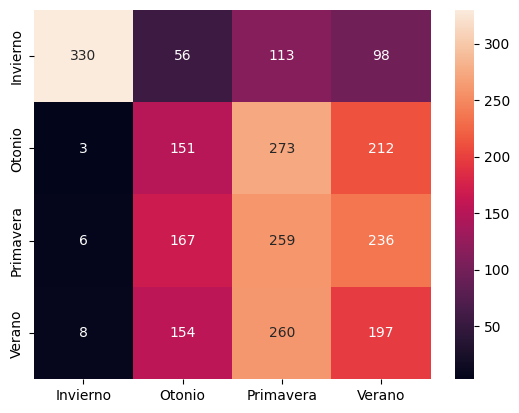

In [225]:
# Matriz de confusion
print(classification_report(y_pred_best_svm,y_test))

cm_1 = (confusion_matrix(y_test, y_pred_best_svm))

sns.heatmap(cm_1,yticklabels=labels_heatmap, xticklabels=labels_heatmap, annot=True, fmt='g')

En **conclusión** el mejor modelo SVM para esta problemática es con kernel gaussiano, con C = 1 y gama = scale.

Analísis de sus métricas:
Gracias al heatmap puedo concluir que el modelo se está confundiendo las clases de Otonio, Primavera y Verano:
  - 272 instancias de otonio son confundidas con primavera
  - 260 instancias de verano son confundidas con primavera

Esta confusión tambien se observa en los bajos valores de Recall y Precisión para estas clases.

El modelo funciona mejor para las instancias de invierno, tiene una alta precisión 70% y un alto recall 95%, por lo que indicaría que el modelo está sesgado a esta clase.

Nueva conclusión el mas eficiente en términos de cómputo es el del kernel lineal per no sirve para captar aquellas relaciones complejas. 

## Random Forest

Hiperparametros:
- n_estimators (números de arboles en el bosque)
- max_depth




In [230]:
rf_1 = RandomForestClassifier(n_estimators=50, bootstrap=True, max_features=None, max_samples=.9, max_depth=4, min_samples_leaf=9,random_state=129)

rf_1.fit(X_train, y_train)
y_pred_rf_1 = rf_1.predict(X_test)

In [231]:
print(classification_report(y_pred_rf_1,y_test))

              precision    recall  f1-score   support

           0       0.54      0.97      0.69       333
           1       0.18      0.27      0.22       428
           2       0.62      0.30      0.40      1397
           3       0.17      0.28      0.21       365

    accuracy                           0.38      2523
   macro avg       0.38      0.45      0.38      2523
weighted avg       0.47      0.38      0.38      2523



<Axes: >

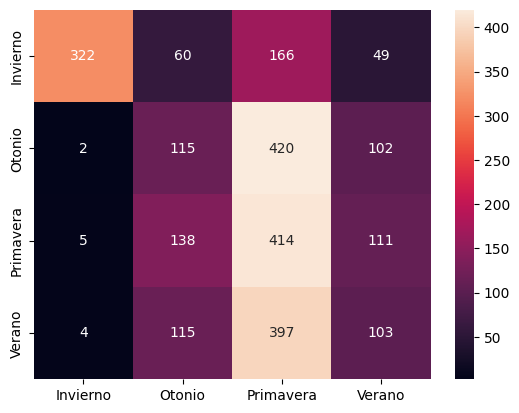

In [232]:
# heatmap
cm = (confusion_matrix(y_test, y_pred_rf_1))

sns.heatmap(cm,yticklabels=labels_heatmap, xticklabels=labels_heatmap, annot=True, fmt='g')

COn 50 árboles se logra tener un accuracy general del 38%. Lo cual para este problema, es bajo.

Analisis de las métricas segun las clases:
Invierno:
-  Precision: Para el 54% de las veces la predicción es correcta.
-  Recall: El modelo logra identificar correctamente el 97% de las muestras reales de "Invierno", tiene muy pocos falsos negativos.
-  F1-Score: 0.69 refleja un buen equilibrio entre la precisión y el recall. Aunque la precisión no es tan alta, el recall es muy bueno, lo que significa que el modelo prefiere identificar "Invierno" correctamente, incluso si algunas predicciones son incorrectas.

Otoño
-  Precisión : predice correctamente "Otoño" solo el 18% de las veces.
- Recall: Solo el 27% de las instancias de "Otoño" se identifican correctamente, lo que significa que muchas muestras de "Otoño" están siendo mal clasificadas como otras clases.
- F1-Score: El 22% refleja que la precisión como el recall son bajos, lo que indica que el modelo está fallando en predecir adecuadamente "Otoño".

Primavera

- Precisión: El 62% de las veces está correcto. Aunque la precisión es razonable, aún hay un margen de mejora.

- Recall: el modelo solo identifica correctamente el 30% de las muestras reales de "Primavera". Muchas instancias de "Primavera" están siendo clasificadas como otras clases mayormente otonio y verano.

- F1-Score: 40% refleja una mezcla de buenos y malos resultados. Aunque la precisión es alta, el recall bajo perjudica el equilibrio general entre ambas métricas.

Verano

- Precisión 0.17: Solo el 17% de las veces es correcta, lo que indica un alto número de falsos positivos.

- Recall:  Solo el 28% de las muestras reales de "Verano" fueron correctamente identificadas por el modelo. Esto refleja que muchas instancias de "Verano" se están clasificando incorrectamente.

- F1-Score: El 21%  indica que el modelo tiene un rendimiento muy pobre en la clase "Verano". La baja precisión y recall contribuyen a este resultado.



### Búsqueda de mejores parametros


In [235]:
best_forest = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [50, 100, 200,],
    'max_depth': [10, 20, 30, 40],
}

grid_search = GridSearchCV(estimator=best_forest, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

In [236]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [241]:
print(f"Mejor número de estimadores (n_estimators): {grid_search.best_params_['n_estimators']}")
print(f"Mejor profundidad máxima (max_depth): {grid_search.best_params_['max_depth']}")
print(f"Mejor puntuación de validación cruzada: {grid_search.best_score_}")


best_rf = grid_search.best_estimator_
y_pred_best_for = best_rf.predict(X_test)


print("\nReporte de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred_best_for))

Mejor número de estimadores (n_estimators): 200
Mejor profundidad máxima (max_depth): 10
Mejor puntuación de validación cruzada: 0.38456302533481296

Reporte de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.98      0.55      0.71       597
           1       0.29      0.27      0.28       639
           2       0.29      0.40      0.33       668
           3       0.27      0.29      0.28       619

    accuracy                           0.38      2523
   macro avg       0.46      0.38      0.40      2523
weighted avg       0.45      0.38      0.40      2523



<Axes: >

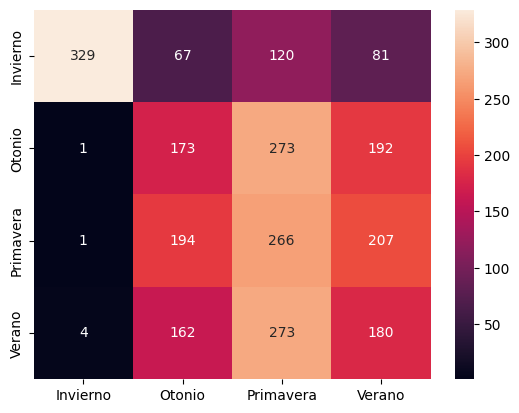

In [242]:
# Heatmap
cm = (confusion_matrix(y_test, y_pred_best_for))

sns.heatmap(cm,yticklabels=labels_heatmap, xticklabels=labels_heatmap, annot=True, fmt='g')

Al buscar los mejores hiperparámetros para RandomForest la precisión para la clase de invierno mejora al 98%. Si bien sigue confundiendo instancias de esta con las otras estaciones, por el heatmap se observa como no confunde las demas estaciones con invierno.

En conlcusión, incluso tunneando los hiperparámetros el comportamiento del modelo es igual que en los demas casos. En todos los modelos, la clase invierno es la que mejor logran identificar mientras que las estaciones de primavera, verano y otonio son confudidas entre ellas pero la razón puede ser la muy parecida distribución de las características.

Random forest es mejor ante la presencia de outliers y si se necesita interpretabilidad. 